In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


Sentiment Analysis


In [7]:
#sentiment analysis means to detect whether the review is positive or not.

In [8]:
df=pd.read_csv('/content/drive/MyDrive/nlp/Restaurant_Reviews.tsv',sep='\t')

In [9]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
#tsv file means 2 columns are separated by space and separated by comma means csv file.
# the review is in  pragraph form means the data is unstructured 
#we have to perform the text preprocessing on paragraph
'''1.tokenization
 2.Tokenization.
3.Lower casing.
4.Stop words removal.
5.Stemming.
6.Lemmatization.'''
#then make the word cloud


'1.tokenization\n 2.Tokenization.\n3.Lower casing.\n4.Stop words removal.\n5.Stemming.\n6.Lemmatization.'

In [11]:
#to show numberof rows and column
df.shape

(1000, 2)

In [12]:
#to checknullvalue
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [13]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [14]:
from wordcloud import WordCloud,STOPWORDS
#worcloud and stopword are inbuilt class of wordcloudpackage

In [15]:
#building word cloud
#seeing the fake news category 
df[df['Liked']==1]

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [16]:
#merging the fake news and and making a paragraph and then making the wordcloud of the fake news message
#merging usingjoin
content=''.join(df[df['Liked']==1]['Review'])
print(content)

Wow... Loved this place.Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.The selection on the menu was great and so were the prices.The fries were great too.A great touch.Service was very prompt.I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!Highly recommended.The food, amazing.Service is also cute.I could care less... The interior is just beautiful.So they performed.That's right....the red velvet cake.....ohhh this stuff is so good.This hole in the wall has great Mexican street tacos, and friendly staff.Also there are combos like a burger, fries, and beer for 23 which is a decent deal.I found this place by accident and I could not be happier.Overall, I like this place a lot.The only redeeming quality of the restaurant was that it was very inexpensive.Ample portions and good prices.My first visit to Hiro was a delight!The shrimp tender and moist.On a positive note, our server was very attentive and provided great service.The only thing

In [17]:
wc=WordCloud(width=800,height=800,background_color='green',stopwords=STOPWORDS,min_font_size=10)
#least repated value font min_font_size=10

In [18]:
#using inbuilt method of wordcloud to draw the word cloud which is defined in wordcloud class
wc.generate(content)


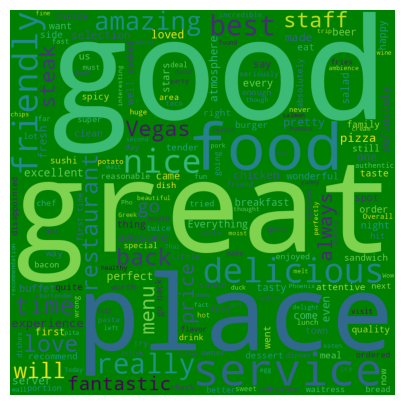

In [19]:
#to show the wordcloud on output screen
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(wc)#imageshow which define in  matplotlib
plt.axis('off')
plt.show()

In [20]:
#merging the fake news and and making a paragraph and then making the wordcloud of the fake news message
#merging usingjoin
content1=''.join(df[df['Liked']==0]['Review'])
print(content)

Wow... Loved this place.Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.The selection on the menu was great and so were the prices.The fries were great too.A great touch.Service was very prompt.I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!Highly recommended.The food, amazing.Service is also cute.I could care less... The interior is just beautiful.So they performed.That's right....the red velvet cake.....ohhh this stuff is so good.This hole in the wall has great Mexican street tacos, and friendly staff.Also there are combos like a burger, fries, and beer for 23 which is a decent deal.I found this place by accident and I could not be happier.Overall, I like this place a lot.The only redeeming quality of the restaurant was that it was very inexpensive.Ample portions and good prices.My first visit to Hiro was a delight!The shrimp tender and moist.On a positive note, our server was very attentive and provided great service.The only thing

In [21]:
#using inbuilt method of wordcloud to draw the word cloud which is defined in wordcloud class
wc.generate(content1)

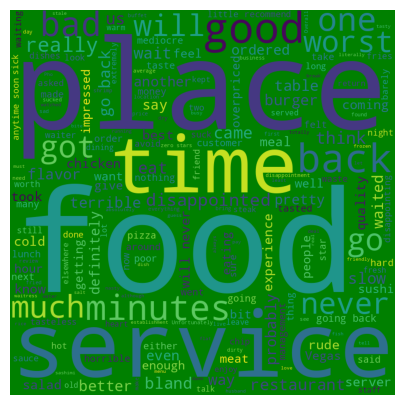

In [22]:
#to show the wordcloud on output screen
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(wc)#imageshow which define in  matplotlib
plt.axis('off')
plt.show()

In [23]:
import nltk
nltk.download('punkt')#puntk used for removing punctuation in text
nltk.download('wordnet')
nltk.download('stopwords')#stopwords used for removing common words such as the,in ,my in text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
#now preforming text preprocessing(text mining)
#seeing the list of stopwords
stop=stopwords.words('english')

In [25]:
#create user deinedfunction for text preprocessing
def clean_text(review):
  #step 1 :first converts all messages in lower case
  review=review.lower()
  #step 2 :apply tokenizer
  tokens=word_tokenize(review)
  #filtering only alphabets ,means to remove digit and special character(punctuation marks) then use inbuilt metghod isalpha()
  review=[w for w in tokens if w.isalpha()]
  #now removing stopwords
  review=[w for w in review if w not in stop]
  print(review)
  #next step of preprocessin is lemmatization:
  #create the object of WordNetLemmatizer class
  lemma=WordNetLemmatizer()
  review=[lemma.lemmatize(w) for w in review]
  return ' '.join(review)


In [26]:
#call function means we apply the clean_text() on the entire column  of message dataset
df['Review']=df['Review'].apply(clean_text)#apply when we to take ine i=one input

['wow', 'loved', 'place']
['crust', 'good']
['tasty', 'texture', 'nasty']
['stopped', 'late', 'may', 'bank', 'holiday', 'rick', 'steve', 'recommendation', 'loved']
['selection', 'menu', 'great', 'prices']
['getting', 'angry', 'want', 'damn', 'pho']
['honeslty', 'taste', 'fresh']
['potatoes', 'like', 'rubber', 'could', 'tell', 'made', 'ahead', 'time', 'kept', 'warmer']
['fries', 'great']
['great', 'touch']
['service', 'prompt']
['would', 'go', 'back']
['cashier', 'care', 'ever', 'say', 'still', 'ended', 'wayyy', 'overpriced']
['tried', 'cape', 'cod', 'ravoli', 'chicken', 'cranberry', 'mmmm']
['disgusted', 'pretty', 'sure', 'human', 'hair']
['shocked', 'signs', 'indicate', 'cash']
['highly', 'recommended']
['waitress', 'little', 'slow', 'service']
['place', 'worth', 'time', 'let', 'alone', 'vegas']
['like']
['burrittos', 'blah']
['food', 'amazing']
['service', 'also', 'cute']
['could', 'care', 'less', 'interior', 'beautiful']
['performed']
['right', 'red', 'velvet', 'cake', 'ohhh', 'stuf

In [27]:
df['Review'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: Review, dtype: object

In [28]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [29]:
x=df['Review']
y=df['Liked']

In [30]:
#now converting review column to number format using vectorization
#1.using count vector



In [31]:
#Now once we have the clean text in hand, The next thing that we would like to do is convert the text 
#into vector/number.

#First , we trying the first technique : - CountVectorizer() : to converts text into vector/number
#first call class CountVectorizer inbuilt class
from sklearn.feature_extraction.text import CountVectorizer

#Create the object of CountVectorizer class
cv=CountVectorizer()

In [32]:
#applying on x_train and x_test which is input
x=cv.fit_transform(x)


In [33]:
#to check the feature which has been extracted from review after applying countvectroization
cv.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [34]:
x=x.toarray()
x.ndim

2

In [35]:
#split the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [36]:
pd.DataFrame(x_train,columns=cv.get_feature_names_out())

,absolute,absolutely,absolutley,accident,accommodation,accomodate,accordingly,accountant,ache,acknowledged,...,year,yellow,yellowtail,yelpers,yet,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
def create_model(model):
  model.fit(x_train,y_train)
  model.predict(x_test)
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  return model

In [38]:
#create a model with decision tree classifier algorithm
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(random_state=1)#by default it is taking gini index

In [39]:
#now traning the  model wit 70% data
dct.fit(x_train,y_train)#wehave to data whcih is in numver so we are givingx_train_cv

DecisionTreeClassifier(random_state=1)

In [40]:

#now testing the model with 30% data
y_pred=dct.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [41]:
#generating the report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       161
           1       0.70      0.65      0.68       139

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

[[122  39]
 [ 48  91]]


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
#create the object
tfidf=TfidfVectorizer()

In [44]:
x_train_tfidf=tfidf.fit_transform(x)
x_test_tfidf=tfidf.transform(x)

AttributeError: ignored

In [ ]:
x_train_tfidf,x_test_tfidf

In [ ]:
#now traning the  model wit 70% data
dct.fit(x_train_tfidf,y_train)#wehave to data whcih is in numver so we are givingx_train_cv

In [ ]:
#now testing the model with 30% data
y_pred=dct.predict(x_test_tfidf)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
#we have to apply all the algorithm further.

In [45]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [46]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       161
           1       0.70      0.65      0.68       139

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300

[[122  39]
 [ 48  91]]


In [47]:
#we will see here f1 score